# Lab 5: Ordinary Differential Equations

Today we will begin our study of ordinary differential equations (ODEs). ODEs are by far the most common kind of equations in physics, from classical mechanics to particle physics. 

Let's start with a simple, very familiar example:

$$ F = ma.$$

This looks like a simple, algebraic equation, but in fact it is a second order differential equation for the position $x$ of the particle in question:

$$ \frac{d^2 x}{dt^2} = \frac{F}{m}.  $$

Before we get into the study of numerical methods for solving ODEs, this example allows us to illustrate an important point. Any ODE can be brought into a *first order form*, in which we can convert higher order derivatives into a set of coupled first order equations. Remember that the "order" of an ODE refers to the highest derivative found in it. Newton's second law can be recast into *two* first order eqautions by creating what we call an **auxiliary variable**,

$$ 
\begin{align}
\frac{d x}{d t} &= v\\
\frac{d v}{d t} &= \frac{F}{m}
\end{align}
$$
where we have added $v$. In this case, $v$ is the particle's velocity, which is itself a quantity we might care about in our solution. However, there's no requirement that auxiliary variables be things we care about. They may not even have a concrete physical meaning. They are there to make the solution possible in terms of a first order formulation. The auxiliary variables may also be used to eliminate otherwise singular behavior in your ODE that can lead to overflow or other numerical errors. 

This leads us to our standard form for ODEs:

$$
\frac{d \mathbf{f}}{dt} = \mathbf{g}(t,\mathbf{f}),
$$
where $\mathbf{f}$ is a vector ($\mathbf{f} = [x , v]$ in the above case of Newton's 2nd law), and $\mathbf{g}$ is a vector representing the derivatives of $\mathbf{f}$. In our example $\mathbf{g} = [v , F/m]$.
## Boundary Conditions

As you already know from other physics classes, ODEs are not completely specified by their equations alone. In order to get a solution, you also need to specify one or more **boundary conditions**. These are algebraic conditions on the variables at one or more points. Sometimes they are simple conditions, like $x = 0$ at $t = 0$; other times they can be complex algebraic equations between the variables. Boundary conditions can be used to divide ODEs into two broad classes:

* initial value problems (IVP)
* boundary value problems (BVP)

In today's lab, we will deal only with IVPs, which are generally easier to solve.

## Methods for Solving ODEs

There are many, many methods for solving ODEs, but we are only going to focus on one type in this class, the so-called Runga-Kutta family of integrators. Note that algorithms are often called "integrators", because solving a differential equation

$$
\frac{d f}{d t} = g(t),
$$

with initial condition $f(0) = a$ to find $f(b)$ is formally identical to integrating

$$
f(b) = \int_a^b g(t) dt.
$$

Why then are we developing new methods, rather than simply casting the ODE in that form and then using the integration methods we derived last week? The answer lies in the fact that $g(t)$ in physical ODEs are often charactersized by multiple timescales and have complex behavior. We then want to tailor the stepsize $h$ as time goes on (you can substitute space for time, if your problem is spatial rather than temporal). This is what ODE integrators excel at.


### Euler's method

First, we will start with the simplest method, Euler's method. Here we use the definition of the derivative, with a finite stepsize $h = t_{i+1} - t_i$:

$$
\frac{d f}{d t} \simeq \frac{f_{i+1} - f_i}{h} = g(t_i,f_i)
$$

then we rearrange this to solve for the future $f_{i+1} = f(t_{i+1})$ in terms of the past $f_i = f(t_i)$:

$$
f_{i+1} \simeq f_i + h g(t_i, f_i).
$$

This is called an *explicit* method, because the future solution $f_{i+1}$ is definied entirely by quantities known in the past. It may sound like some kind of strange magic, but there are indeed other kinds of methods called *implicit* methods, in which the future solution depends on other future quantities. We will not cover such methods today.

To solve our ODE (or system of ODEs), we simply start at $t= t_0$ and step forwards $h$ at a time until we reach $t = t_{end}$.

Euler's method is $O(h^2)$, and it is asymmetric: it wants to solve the differential equation from $t_i$ to $t_{i+1}$, but uses information only at $t_i$. It's a pretty terrible method to use, because it requires very small $h$ to get an accurate solution, which over a long integration will lead to a lot of round-off error. Furthermore, it is **unstable** for many applications, in which it will give you non-sense solutions.

However, Euler's method is conceptually very important, in the same way that the Trapezoidal rule was very important for integration. It is the building block of more useful methods.

### Second Order Runga-Kutta
We can improve Euler's method by using it to take a "trial" step to the middle of the interval, $t_{i+1/2} = t_i + h/2$, and then evaluate the derivative function $g(t,f)$ at that point. Then, we just combine all the information:

$$
\begin{align}
k_1 &= h g(t_i, f_i)\\
k_2 &= h g(t_i + h/2, f_i + k_1/2)\\
f_{i+1} &= f_i + k_2 + O(h^3)
\end{align}
$$
where we've explicitly included the error term ($O(h^3)$). You should note a very important difference between this and Euler's method: it takes twice as many evaluations of the derivative function, $g(t,f)$. This is called the second order Runga-Kutta method (aka rk2). 

Now it's time to code up rk2. Write a function below that takes a stepsize $h$, an initial $t$, and a function $g(t,f)$ and returns an update value for $f_{i+1}$. 

In [1]:
import numpy as np

def rk2_step(f, h, t, g):
    k1 = h*g(t,f)
    k2 = h*g(t+h/2,f+k1/2)
    return f + k2

Now, let's use this to solve a very simple ODE:

$$
\frac{d N}{dt} = -\gamma N
$$

with $\gamma = 1$, starting with $N(0) = 10^6$ at $t=0$,  and integrating it until $t=5$. 

I'll give you code for $g(t, N) = -\gamma N$, which as you can see does not depend on $t$. However, we still formally include it, because ODEs in our standard form can depend on the independent variable.

In [2]:
def g(t,N,gamma=1):
    return -gamma*N

Now, in the space below, make a list of times, starting with $t=0$, and a list of $N$, starting with $N_0 = 10^6$ and using a timestep $h=0.01$. Using a while loop, that continues as long as $t < t_{stop} = 5$, take an rk2 step to update $N$ and update the value of time $t = t+h$.

In [3]:
N0 = 1e6
t_stop = 5
h = 0.01
t = [0,]
N = [N0,]

while t[-1] < t_stop:
    N_new = rk2_step(N[-1],h,t[-1],g)
    N.append(N_new)
    t.append(round(t[-1]+h,3))

N = np.array(N)
t = np.array(t)


Now that that's done, plot a graph of $N(t)$. Of course, you know the analytic solution for this problem too. So solve the ODE by hand, and then plot on the same plot the value for $N_{exact}$ at each of the $t$ points your ODE integrator used to find its approximate values. Looking at the plot by eye, was your solution accurate?

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

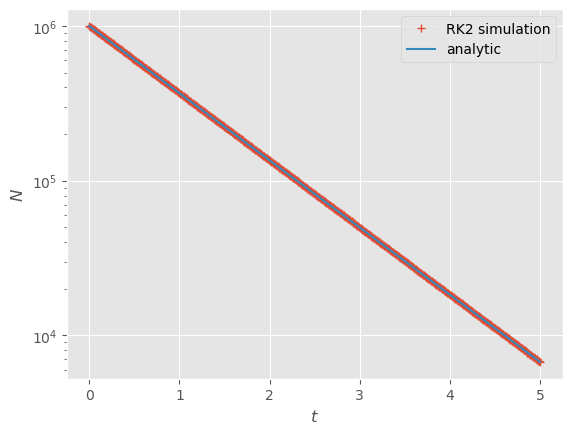

In [5]:
plt.semilogy(t,N,'+', label='RK2 simulation')
plt.semilogy(t,N[0]*np.exp(-t), label='analytic')
plt.xlabel(r'$t$')
plt.ylabel(r'$N$')
plt.legend(loc='upper right')

We have developed the rk2 solver and used it to solve a simple ODE. However, as we will see, it is not terribly accurate and requires very small stepsize $h$ to get a good solution. We're also going to focus on writing good **production code**, because starting next week, we will be using our rk solvers as workhorses to run many simulations. Doing so will allow us to focus on the *physics* we can learn from solving complex, non-linear differential equations via computer. 

Now, we will

* generalize rk2 to more useful, higher order schemes
* see how our rk methods can be used on *systems* of ODEs
* learn about what constitutes "good" code 
* compare rk2 to our more powerful rk4 scheme

## Generalizing rk2

Recall from last time that the rk2 algorithm can be written as 

$$
\begin{align}
k_1 &= h g(t_i, f_i)\\
k_2 &= h g(t_i + h/2, f_i + k_1/2)\\
f_{i+1} &= f_i + k_2 + O(h^3)
\end{align}
$$

Hopefully, you coded up something like this:

In [6]:
def rk2(f,t,h,g):
    k1 = h*g(t,f)
    k2 = h*g(t+h/2,f+k1/2)
    return f + k2

It has probably occurred to you that you need not stop with just two function calls. Of course, the more function calls your method has, the slower it will be for a single timestep. So, in order to make it worthwhile, your new method had better allow you to take a  much larger timestep.

By far the most popular ODE integrator for general-purpose scientific work is 4th order Runga-Kutta (aka rk4). This method has an error that is $O(h^5)$. Why is this method so popular? It's because rk4 requires exactly four function evaluations; higher order methods require more than their order: 5th order requires 6 function calls, 6th order requires 7, 7th order requires 9, 8th order requires 11 (Numerical Recipes, Ch. 17, p 912). 

So let's code it up:

In [7]:
def rk4(f,t,h,g):
    k1 = h*g(t,f)
    k2 = h*g(t+0.5*h, f+0.5*k1)
    k3 = h*g(t+0.5*h, f+0.5*k2)
    k4 = h*g(t+h, f+k3)
    
    return f+ k1/6. + k2/3. + k3/3. + k4/6.

## Solving systems of ODEs


Now we'll test it, but not on the simple decay problem from last time, but a more complex problem: a damped harmonic oscillator. First, remember from last time that we can solve arbitrarily high order ODEs by reformulating them as a *system* of first order ODEs. 

$$
\frac{d \mathbf{f}}{dt} = \mathbf{g}(t,\mathbf{f}),
$$
where $\mathbf{f}$ is a vector ($\mathbf{f} = [x , v]$ in the above case of Newton's 2nd law), and $\mathbf{g}$ is a vector representing the derivatives of $\mathbf{f}$. In our example $\mathbf{g} = [v , F/m]$.

Look closely: the `dho` function expects `f` to be a numpy array of length 2, and it returns a numpy array of length two representing the right hand side (here I rename $\mathbf{g}$ to `RHS`): 

In [8]:
def dho(t,f):
    """the damped harmonic oscillator has
    
    F = -k*x - gamma*v
    
    recall that for a Newton's second law system, we have
    
    df_vec/dt = RHS:
    
    df_vec[0]/dt = v
    df_vec[1]/dt = F/m
    
    where f[0] is the position x
          f[1] is the velocity v
    """
    
    gamma = 0.1
    m = 1.
    k = 1.
    
    x = f[0]
    v = f[1]
    RHS = np.array([v,(-k*x - gamma*v)/m])
    return RHS 

Feel free to play around with values of `gamma` and `k`. You may need to adjust the stop time `t_stop` below. Make sure you understand what is going on. In particular, now would be a **great** time to think about units. How do the units work here? 

Other things you should consider in the following code:

* How does the loop work?
* Why are we storing the new solution in a variable called `xold`?
* Why are we appending the values of `x = f[0]` and `v = f[1]` to lists separately? Do we have to do this?
* Could we wrap the code in the following cell in a function, and call it with different $h$? What parameters should this function take? You might call this function something like `rk_driver`, since it will *drive* the rk.

In [9]:
# initial conditions:
x0 = np.array([1., 0.]) # spring is at x = 1, with no initial velocity.
t0 = 0. # start at t= 0

t_stop = 32*np.pi
x = [x0[0],]
v = [x0[1],]
t = [t0,]
xold = x0
h=0.001 # modify this!
while t[-1] < t_stop:
    xold = rk4(xold,t[-1],h,dho)
    x.append(xold[0])
    v.append(xold[1])
    t.append(t[-1]+h)

In the cell below, make a plot of $x$ and $v$ as a function of time. Make sure to label all axes!

Text(0, 0.5, 'Position/Velocity')

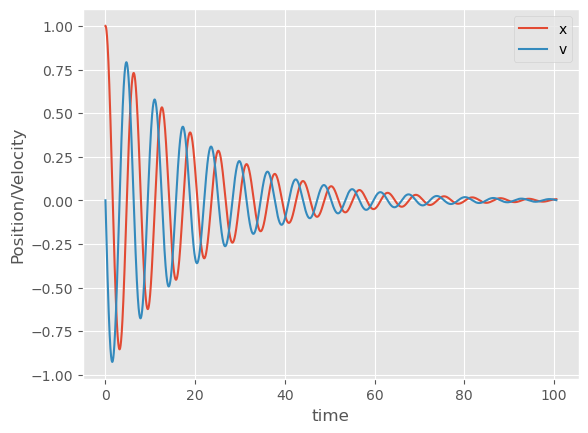

In [10]:
plt.figure()
plt.plot(t,x,label='x')
plt.plot(t,v, label='v')
plt.legend()
plt.xlabel("time")
plt.ylabel('Position/Velocity')

## Comparing rk2 and rk4

Given that rk4 costs more to run, we would hope that rk4 can be run with a much larger stepsize $h$ to compensate, otherwise we would simply use rk2. 

Let's consider a new model problem: the non-linear oscillator. We've considered a damped harmonic oscillator so far, which is still a linear problem. A simple harmonic oscillator arises when we have something like a spring that has a force $F_k = -k x$ which is proportional to the distance $x$ from equilibrium. Given this force alone,

$$
m \frac{d^2 x}{dt^2} = -k x.
$$

However, real springs (and the many, many other things we model as springs like waves and molecules and a host of other things) are *non-linear*. One way to model the nonlinearity is to consider the potential function that creates the force in the first place. One particularly simple model is to consider potentials of the form

$$
V_p(x) = \frac{1}{p} k x^p
$$
where $p$ is *even*. Remember that every conservative force is the negative gradient of a potential, so

$$
F_p = - \frac{d V}{dx} = -k x^{p-1}
$$

Think for a bit about why $p$ must be even for this to work. As a hint, set the equilibrium point to be $x = 0$. What happens to the force for an odd $p$ as you go to the left ($x < 0$) and right ($x >0$).



To test our integrators, let's use $p=2$. This is, of course, gives a linear force and thus a simple harmonic oscillator. The question we want to ask is: for what value of $h$ do we get a good solution?

First, code up a force function for $F_k = -k x$. Make sure the function takes both $t$ and $\mathbf{f} = [x,v]$! The rk2 and rk4 routines always expect the right hand side functions to take both, even if we don't use one. This allows us to use the *same* ODE integrator for many problems. **Good code is reusable code!** Don't reinvent the wheel. Of course, in a sense we are reinventing the wheel here, since all these ODE integrators have been written by others in a much more efficient manner. But you *must* write your own code to understand how others' works. 

For this test, we don't need to save a list of all `x` and `v` as functions of time. All we're going to care about is the final point. What you need to do is write a simple "driver" function that runs either `rk2` or `rk4` from a start time to a stop time with a given stepsize `h`. Then, run this function for both `rk2` and `rk4` on a set of decreasing $h$. Save the final values of $x$ and $v$ for each $h$ for both rk2 and rk4. Finally, make a plot of the fractional error $\epsilon_x = |x - x_{analytic}|/x_{analytic}$ and $\epsilon_v = |v - v_{analytic}|/v_{analytic}$.

For the analytic solution, remember that the frequency $\omega = \sqrt{k/m}$, and the oscillation will occur over a time period $T = 2 \pi/\omega$. Choose $k$ and $m$ such that $T$ is a convenient number to work with, and make sure `t_stop` is at least 5 periods. 

In [11]:
def rk_driver(f0, tstart, tstop, h, rhs, method='rk2'):
    if method == 'rk2':
        stepper = rk2
    elif method == 'rk4':
        stepper = rk4
    else:
        raise ValueError("{} is not a supported integrator. Valid choices are rk2 or rk4".format(stepper))
    
    t = tstart
    xold = f0
    while t < t_stop:
        xold = stepper(xold,t,h,rhs)
        t = round(t+h, 8) # will work as long as step size >10^-8 and will avoid rounding errors which caue end point errors
    return xold, t

In [12]:
def sho(t,f):
    """simple harmonic oscillator has
    
    F = -k*x
    
    recall that for a Newton's second law system, we have
    
    df_vec/dt = RHS:
    
    df_vec[0]/dt = v
    df_vec[1]/dt = F/m
    
    where f[0] is the position x
          f[1] is the velocity v
    """

    m = 1.
    k = np.pi**2
    
    x = f[0]
    v = f[1]
    RHS = np.array([v,(-k*x)/m])
    return RHS 

<function matplotlib.pyplot.show(close=None, block=None)>

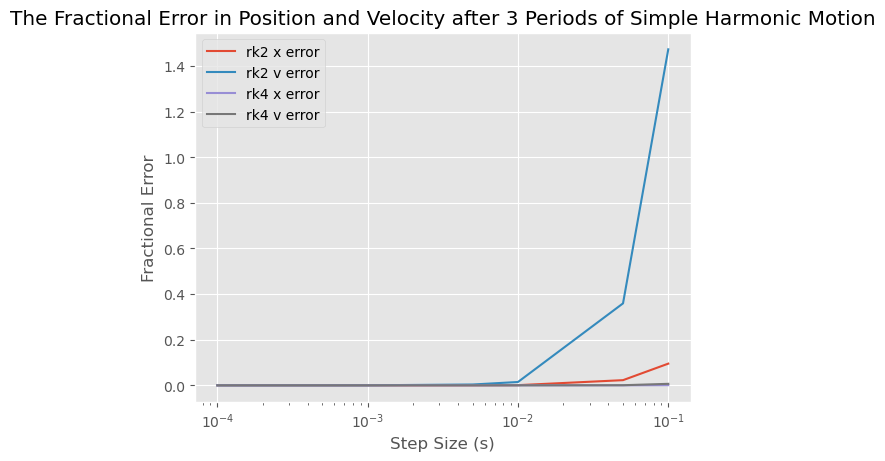

In [19]:
# initial conditions:
t_start = 0
t_stop = 6 # BY DEFINITION OF M AND K THIS IS 3 FULL CYCLES
ha = np.array([0.1,0.05,0.01,0.005,0.001,0.0005,0.0001])
curr_pos_v = ([3., 2.])

rk_options = ['rk2', 'rk4']

rk2_xout = []
rk2_vout = []
rk4_xout = []
rk4_vout = []

for i in range(len(rk_options)):
    for h in ha:
        rk_func_str = rk_options[i]
        x0,t_final = rk_driver(curr_pos_v,t_start, t_stop ,h,sho, method = rk_func_str)
        if t_final != 6: # with out round in rk_driver it is ok to compare floats
            raise Error("t_final is not exactly 6 seconds or three periods so out fracitonal errors will be wrong!")
        x_out = x0[0]
        v_out = x0[1]
        if i == 0: #rk2
            rk2_xout.append(x_out)
            rk2_vout.append(v_out)
        if i == 1: #RK4
            rk4_xout.append(x_out)
            rk4_vout.append(v_out)

x_analytical = 3 # because we went exactly 3 periods (6s)(T = 2 \pi/(k/m)^(.5) = 2s)
v_analytical = 2

# converting to numpy arrays so we can do algebra with them
rk2_xout = np.array(rk2_xout)
rk2_vout = np.array(rk2_vout)
rk4_xout = np.array(rk4_xout)
rk4_vout = np.array(rk4_vout)

rk2_x_err = abs(rk2_xout - x_analytical)/ x_analytical
rk2_v_err = abs(rk2_vout - v_analytical)/ v_analytical
rk4_x_err = abs(rk4_xout - x_analytical)/ x_analytical
rk4_v_err = abs(rk4_vout - v_analytical)/ v_analytical



plt.plot(ha, rk2_x_err, label = 'rk2 x error')
plt.plot(ha, rk2_v_err, label = 'rk2 v error')
plt.plot(ha, rk4_x_err, label = 'rk4 x error')
plt.plot(ha, rk4_v_err, label = 'rk4 v error')
plt.xscale('log')
plt.legend()
plt.xlabel("Step Size (s)")
plt.ylabel("Fractional Error")
plt.title("The Fractional Error in Position and Velocity after 3 Periods of Simple Harmonic Motion")
plt.show()

It is clear that rk2 is worse in both cases though for this simple case they all appear to work for small enough step sizes. Lets look more closely at smaller step sizes. 

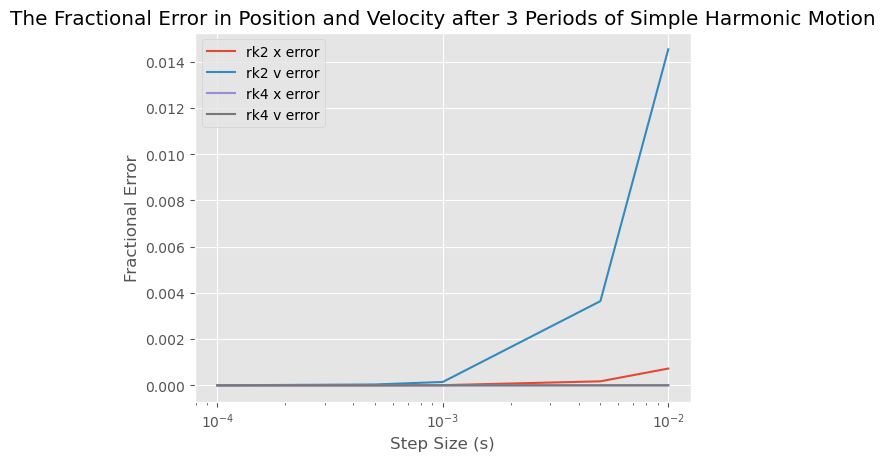

In [20]:
plt.plot(ha[2:], rk2_x_err[2:], label = 'rk2 x error')
plt.plot(ha[2:], rk2_v_err[2:], label = 'rk2 v error')
plt.plot(ha[2:], rk4_x_err[2:], label = 'rk4 x error')
plt.plot(ha[2:], rk4_v_err[2:], label = 'rk4 v error')
plt.xscale('log')
plt.legend()
plt.xlabel("Step Size (s)")
plt.ylabel("Fractional Error")
plt.title("The Fractional Error in Position and Velocity after 3 Periods of Simple Harmonic Motion")
plt.show()

We see this same shape. Lets look at the errors without the error in the velocity in rk2 as it is so large and messes the scale. 

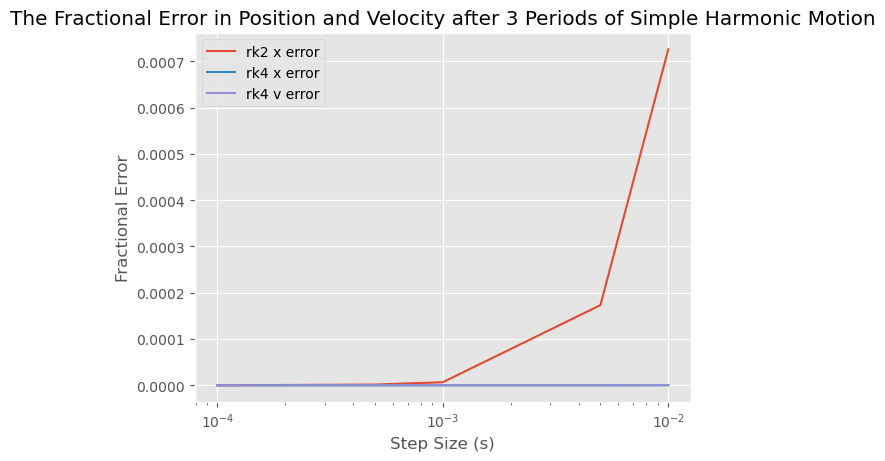

In [22]:
plt.plot(ha[2:], rk2_x_err[2:], label = 'rk2 x error')
plt.plot(ha[2:], rk4_x_err[2:], label = 'rk4 x error')
plt.plot(ha[2:], rk4_v_err[2:], label = 'rk4 v error')
plt.xscale('log')
plt.legend()
plt.xlabel("Step Size (s)")
plt.ylabel("Fractional Error")
plt.title("The Fractional Error in Position and Velocity after 3 Periods of Simple Harmonic Motion")
plt.show()

We see that even though the error in rk2 for position looked comparable to rk4, when we adjust the scale it is not. This was for a simple ODE, too. I see why it is worth the computational expences to use rk4 for general purpose scientific work. 